## HAMOYE DATA SCIENCE INTERNSHIP ASSESSMENT SOLUTION SHEET STAGE B

### The code solutions illustrated below is derived from the quiz assessment in Hamoye stage b course on; Machine Learning: Regression - Predicting Energy Efficiency of Buildings.

#### Questions

##### Q1. In linear regression, L2 regularization is equivalent to imposing?
##### Q2. Cross Validation is?
##### Q3. Ridge Regression is?
##### Q4. In the different terms of the bias-trade-off, what is subtantially more harmful to the test error than the training error?
##### Q5. What can you use to find the best fit line for the data in linear regression?
##### Q6. What is the truth about outliers in Linear regression?
##### Q7. How many coefficients do you need to estimate a simple linear regression model?
##### Q8. What does adding more basis function in a linear model does?
##### Q9. How do you interpret a best fit line relating X and Y has a R-Squared value of 0.75?
##### Q10. When can Lasso be interpreted as least-squares linear regression?
##### Q11. What is not an assumption of linear regression?
##### Q12. From the energy dataset fit a linear model on the relationship between the temperature(in celsius) in the living room(x=T2) and the temperature outside the building (y=T6). What is the R^2 value?
##### Q13. What is the mean absolute error (MAE) of the energy data?
##### Q14. What is the residual sum of squares (RSS) of the energy data?
##### Q15. What is the root mean squared error (RMSE) of the energy data?
##### Q16. What is the coefficient of determination / R-Squared of the energy data?
##### Q17. Obtain the feature weights from the linear model above. Which of the features has the lowest and highest weight respectively.
##### Q18. Train a Ridge regression model with an alpha of 0.4. Is there any change to the root mean squared error when evaluated on test set?
##### Q19. Train a Lasso regression model with an alpha of 0.001 and obtain the new feature weights with it. How many of the features have a non-zero feature weights?
##### Q20. What is the new root mean squared error with the Lasso Regression?

#### Solution

###### The code solution below are for the mathematical question in Q12-Q20!!!

##### Importation of relevant python library

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pplt

##### Importation of the Energy dataset downloaded from UCI respiratory

In [22]:
energy_data = pd.read_csv('energydata_complete.csv')
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


###### Understaing the Energy data

In [23]:
energy_data.shape

(19735, 29)

In [24]:
energy_data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [25]:
energy_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [26]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


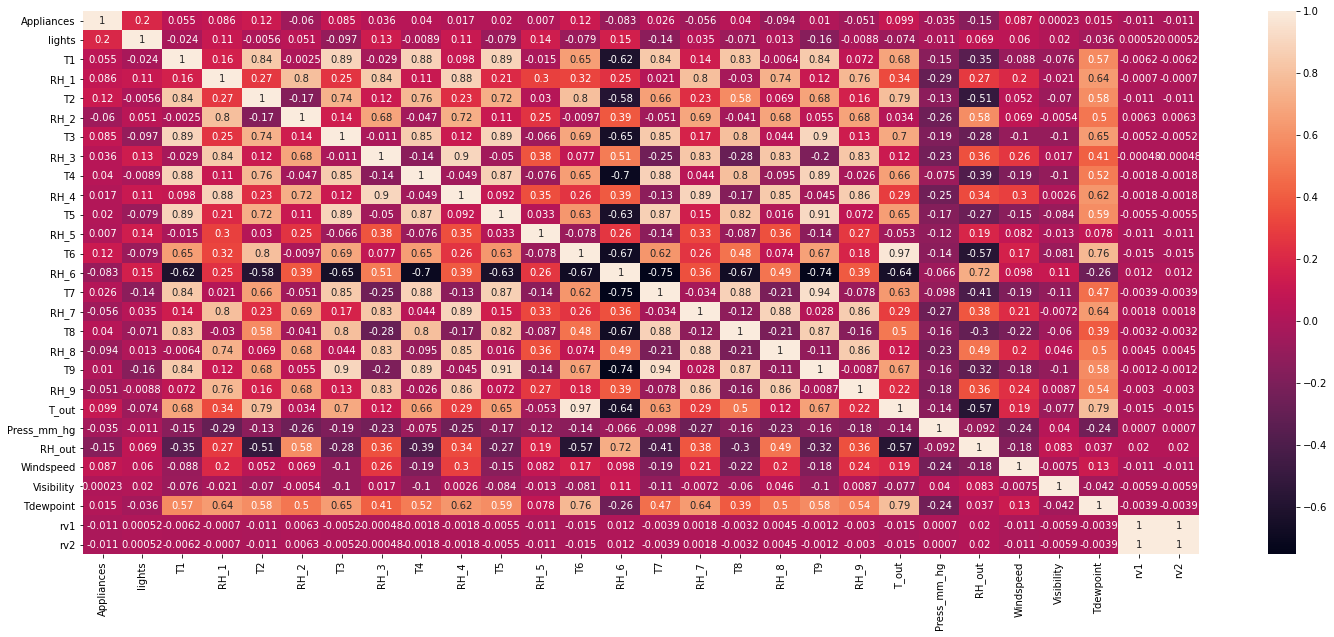

In [27]:
correlation = energy_data.corr()#
fig, ax = pplt.subplots(figsize=(25,10))
sns.heatmap(correlation, annot=True)

In [28]:
sns.pairplot(energy_data)

MemoryError: 

###### Data Classification and Preparation

In [29]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [30]:
df = energy_data.drop(columns=['date', 'lights'])
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
X = df.drop(columns=['Appliances'])
y = df['Appliances']
t2 = df.iloc[:, 3:4].values
t6 = df.iloc[:, 11:12].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state= 42)

t2_train, t2_test, t6_train, t6_test = train_test_split(t2,t6, test_size=0.30, random_state=42)

##### Answer 12

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(t2_train, t6_train)
t6_pred = lin_reg.predict(t2_test)

from sklearn.metrics import r2_score
r2 = r2_score(t6_test, t6_pred)
r2 = round(r2, 2)
r2

0.64

##### Answer 13

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae = round(mae, 2)
print('The mean absolute error of the linear regression model is: ', mae)

The mean absolute error of the linear regression model is:  0.05


###### Answer 14

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Residual sum of square
rss = np.sum(np.square(y_test - y_pred))
rss = round(rss,2)
print('The residual sum of square from the linear regression model is: ', rss)

The residual sum of square from the linear regression model is:  45.35


###### Answer 15

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse = round(rmse, 3)
print('The root mean squares of error from the linear model is: ', rmse)

The root mean squares of error from the linear model is:  0.088


###### Answer 16

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2 = round(r2, 2)
print('The coefficient of determination (r-squared) for the linear model is: ', r2)

The coefficient of determination (r-squared) for the linear model is:  0.15


##### Answer 17

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

model = lin_reg.coef_
model = ['{:f}'.format(item) for item in model]
column = X_train.columns
lin_weight = pd.DataFrame({'Features': column, 'Linear Model Weight': model})
lin_weight

,Features,Linear Model Weight
0,T1,-0.003281
1,RH_1,0.553557
2,T2,-0.236195
3,RH_2,-0.456715
4,T3,0.290633
5,RH_3,0.096034
6,T4,0.028996
7,RH_4,0.026389
8,T5,-0.015663
9,RH_5,0.016007


###### Answer 18

In [38]:
from sklearn.linear_model import Ridge
rig_reg = Ridge(alpha=0.5)
rig_reg2 = Ridge(alpha=0.4)
rig_reg.fit(X_train, y_train)
rig_reg2.fit(X_train,y_train)
y_pred = rig_reg.predict(X_test)
y_pred2 = rig_reg2.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
rmse = round(rmse, 3)
rmse2 = round(rmse2, 3)
print('The root mean squares of error from the ridge model with alpha of 0.5 & 0.4 respectively: ', rmse, '& ' , rmse2)

The root mean squares of error from the ridge model with alpha of 0.5 & 0.4 respectively:  0.088 &  0.088


###### Answer 19

In [39]:
from sklearn.linear_model import Lasso
las_reg = Lasso(alpha=0.001)
las_reg.fit(X_train, y_train)
y_pred = las_reg.predict(X_test)

model = las_reg.coef_ != 0
column = X_train.columns
las_weight = pd.DataFrame({'Features': column, 'Linear Model Weight': model})
print('Checking how many time where Lasso weight appears to be non-zero. The True count shows 4 times.')
las_weight['Linear Model Weight'].value_counts()

Checking how many time where Lasso weight appears to be non-zero. The True count shows 4 times.


False    22
True      4
Name: Linear Model Weight, dtype: int64

###### Answer 20

In [40]:
from sklearn.linear_model import Lasso
las_reg = Lasso(alpha=0.001)
las_reg.fit(X_train, y_train)
y_pred = las_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse = round(rmse, 3)
print('The root mean squares of error from the linear model is: ', rmse)

The root mean squares of error from the linear model is:  0.094
